<a href="https://colab.research.google.com/github/MAPMEJIAD/course_work/blob/main/course_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Импорт библиотек и настройки отображения датасетов

In [ ]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels as st
from sklearn import feature_selection
import scipy.stats as stats
from google.colab import drive
drive.mount("/content/drive/", force_remount = True)
%matplotlib inline

pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 15)
pd.set_option('display.width', 1000)

Mounted at /content/drive/


## Загрузка данных

In [ ]:
# Ненулевые столбцы (не включая дату рождения)
useful_columns = ['Номер', 'кальций сыворотки крови (ммоль/л)', 'фосфор сыворотки крови (ммоль/л)', 'оксипролин сыворотки крови (мкмоль/л)', 'экскреция кальция (мМ/сутки)', 'экскреция фосфора (ммоль/л)', 'экскреция оксипролина (мкм/мг креатинина)', 'Время удержания позы (мин.)', 'Величина кифоза в градусах в грудном отделе позвоночника', 'Изменение контуров замыкательных пластинок', 'Клиновидная форма тел позвонков', 'Остеопороз тел позвонков', 'Стабилографические изменения', 'ЭНМГ', 'Целевое значение']
# Только здоровые
all_healthy = pd.read_excel('/content/drive/MyDrive/course_work/course_data_base.xlsx', sheet_name='healthy', usecols = useful_columns, index_col=[0])
# Только больные
all_sick = pd.read_excel('/content/drive/MyDrive/course_work/course_data_base.xlsx', sheet_name='sick', usecols = useful_columns, index_col=[0])
# Вся выборка
everyone = pd.read_excel('/content/drive/MyDrive/course_work/course_data_base.xlsx', sheet_name='all', usecols = useful_columns, index_col=[0])
# Показатели больных через 3 года лечения
sick_3_years = pd.read_excel('/content/drive/MyDrive/course_work/course_data_base.xlsx', sheet_name='3_years', index_col=[0])
# Показатели больных через 7 лет лечения
sick_7_years = pd.read_excel('/content/drive/MyDrive/course_work/course_data_base.xlsx', sheet_name='7_years', index_col=[0])
everyone

,кальций сыворотки крови (ммоль/л),фосфор сыворотки крови (ммоль/л),оксипролин сыворотки крови (мкмоль/л),экскреция кальция (мМ/сутки),экскреция фосфора (ммоль/л),экскреция оксипролина (мкм/мг креатинина),Время удержания позы (мин.),Величина кифоза в градусах в грудном отделе позвоночника,Изменение контуров замыкательных пластинок,Клиновидная форма тел позвонков,Остеопороз тел позвонков,Стабилографические изменения,ЭНМГ,Целевое значение
Номер,,,,,,,,,,,,,,
1,2.20,1.40,24.90,3.90,23.80,24.09,1.0,33,1,0,1,1,1,1
2,2.67,1.56,25.01,3.70,25.13,23.99,1.0,29,1,0,1,1,1,1
3,2.10,1.34,25.70,3.02,24.70,24.70,2.0,28,1,1,1,1,1,1
4,2.20,1.60,24.80,4.08,23.09,23.09,2.0,28,1,1,1,1,1,1
5,2.40,1.70,26.80,3.50,23.90,25.76,2.0,27,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,2.30,1.60,15.10,2.50,21.10,19.47,9.0,19,0,0,0,0,0,0
299,2.40,1.60,15.40,2.30,25.40,19.34,9.5,20,0,0,0,0,0,0
300,2.20,1.60,15.30,2.20,22.10,19.55,10.0,20,0,0,0,0,0,0


## Информация о датасетах

In [ ]:
everyone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 1 to 302
Data columns (total 14 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   кальций сыворотки крови (ммоль/л)                         302 non-null    float64
 1   фосфор сыворотки крови (ммоль/л)                          302 non-null    float64
 2   оксипролин сыворотки крови (мкмоль/л)                     302 non-null    float64
 3   экскреция кальция (мМ/сутки)                              302 non-null    float64
 4   экскреция фосфора (ммоль/л)                               302 non-null    float64
 5   экскреция оксипролина (мкм/мг креатинина)                 302 non-null    float64
 6   Время удержания позы (мин.)                               302 non-null    float64
 7   Величина кифоза в градусах в грудном отделе позвоночника  302 non-null    int64  
 8   Изменение контуров з

In [ ]:
all_sick.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 202
Data columns (total 14 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   кальций сыворотки крови (ммоль/л)                         202 non-null    float64
 1   фосфор сыворотки крови (ммоль/л)                          202 non-null    float64
 2   оксипролин сыворотки крови (мкмоль/л)                     202 non-null    float64
 3   экскреция кальция (мМ/сутки)                              202 non-null    float64
 4   экскреция фосфора (ммоль/л)                               202 non-null    float64
 5   экскреция оксипролина (мкм/мг креатинина)                 202 non-null    float64
 6   Время удержания позы (мин.)                               202 non-null    float64
 7   Величина кифоза в градусах в грудном отделе позвоночника  202 non-null    int64  
 8   Изменение контуров з

In [ ]:
all_healthy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 14 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   кальций сыворотки крови (ммоль/л)                         100 non-null    float64
 1   фосфор сыворотки крови (ммоль/л)                          100 non-null    float64
 2   оксипролин сыворотки крови (мкмоль/л)                     100 non-null    float64
 3   экскреция кальция (мМ/сутки)                              100 non-null    float64
 4   экскреция фосфора (ммоль/л)                               100 non-null    float64
 5   экскреция оксипролина (мкм/мг креатинина)                 100 non-null    float64
 6   Время удержания позы (мин.)                               100 non-null    float64
 7   Величина кифоза в градусах в грудном отделе позвоночника  100 non-null    int64  
 8   Изменение контуров з

## Коррелированность признаков

In [ ]:
# По Пирсону (плохо, т.к. есть категории)
corr_matrix = everyone.corr()
corr_matrix

,кальций сыворотки крови (ммоль/л),фосфор сыворотки крови (ммоль/л),оксипролин сыворотки крови (мкмоль/л),экскреция кальция (мМ/сутки),экскреция фосфора (ммоль/л),экскреция оксипролина (мкм/мг креатинина),Время удержания позы (мин.),Величина кифоза в градусах в грудном отделе позвоночника,Изменение контуров замыкательных пластинок,Клиновидная форма тел позвонков,Остеопороз тел позвонков,Стабилографические изменения,ЭНМГ,Целевое значение
кальций сыворотки крови (ммоль/л),1.000000,0.000836,0.056081,0.022207,0.131291,0.039406,-0.060845,0.081310,0.061099,-0.116891,0.016845,0.043733,0.098561,0.044415
фосфор сыворотки крови (ммоль/л),0.000836,1.000000,-0.109752,-0.165412,-0.088552,-0.125113,0.103900,-0.131431,-0.036184,-0.083160,-0.070445,-0.146793,-0.121322,-0.127741
оксипролин сыворотки крови (мкмоль/л),0.056081,-0.109752,1.000000,0.820253,0.474717,0.916592,-0.922709,0.906445,0.530773,0.315438,0.414338,0.810395,0.831009,0.972453
экскреция кальция (мМ/сутки),0.022207,-0.165412,0.820253,1.000000,0.360181,0.793725,-0.812018,0.770131,0.451812,0.264233,0.377220,0.736541,0.738884,0.852562
экскреция фосфора (ммоль/л),0.131291,-0.088552,0.474717,0.360181,1.000000,0.459943,-0.455085,0.466088,0.184641,0.020837,0.191498,0.412136,0.452365,0.472595
экскреция оксипролина (мкм/мг креатинина),0.039406,-0.125113,0.916592,0.793725,0.459943,1.000000,-0.905315,0.893960,0.517945,0.315886,0.346892,0.786063,0.813996,0.948349
Время удержания позы (мин.),-0.060845,0.103900,-0.922709,-0.812018,-0.455085,-0.905315,1.000000,-0.889795,-0.494982,-0.264642,-0.399009,-0.807384,-0.823668,-0.947615
Величина кифоза в градусах в грудном отделе позвоночника,0.081310,-0.131431,0.906445,0.770131,0.466088,0.893960,-0.889795,1.000000,0.487908,0.296888,0.342414,0.788147,0.789600,0.930574
Изменение контуров замыкательных пластинок,0.061099,-0.036184,0.530773,0.451812,0.184641,0.517945,-0.494982,0.487908,1.000000,0.236072,0.288537,0.446837,0.461331,0.540202
Клиновидная форма тел позвонков,-0.116891,-0.083160,0.315438,0.264233,0.020837,0.315886,-0.264642,0.296888,0.236072,1.000000,0.273670,0.261450,0.213461,0.302663


In [ ]:
# Отельно лабораторные
# Отдельо время удержания позы и cтабилограф. изменения
# ЭНМГ и рентгенография(Величина кифоза, изменения контура, клиновидная форма и остеопороз)

<Axes: >

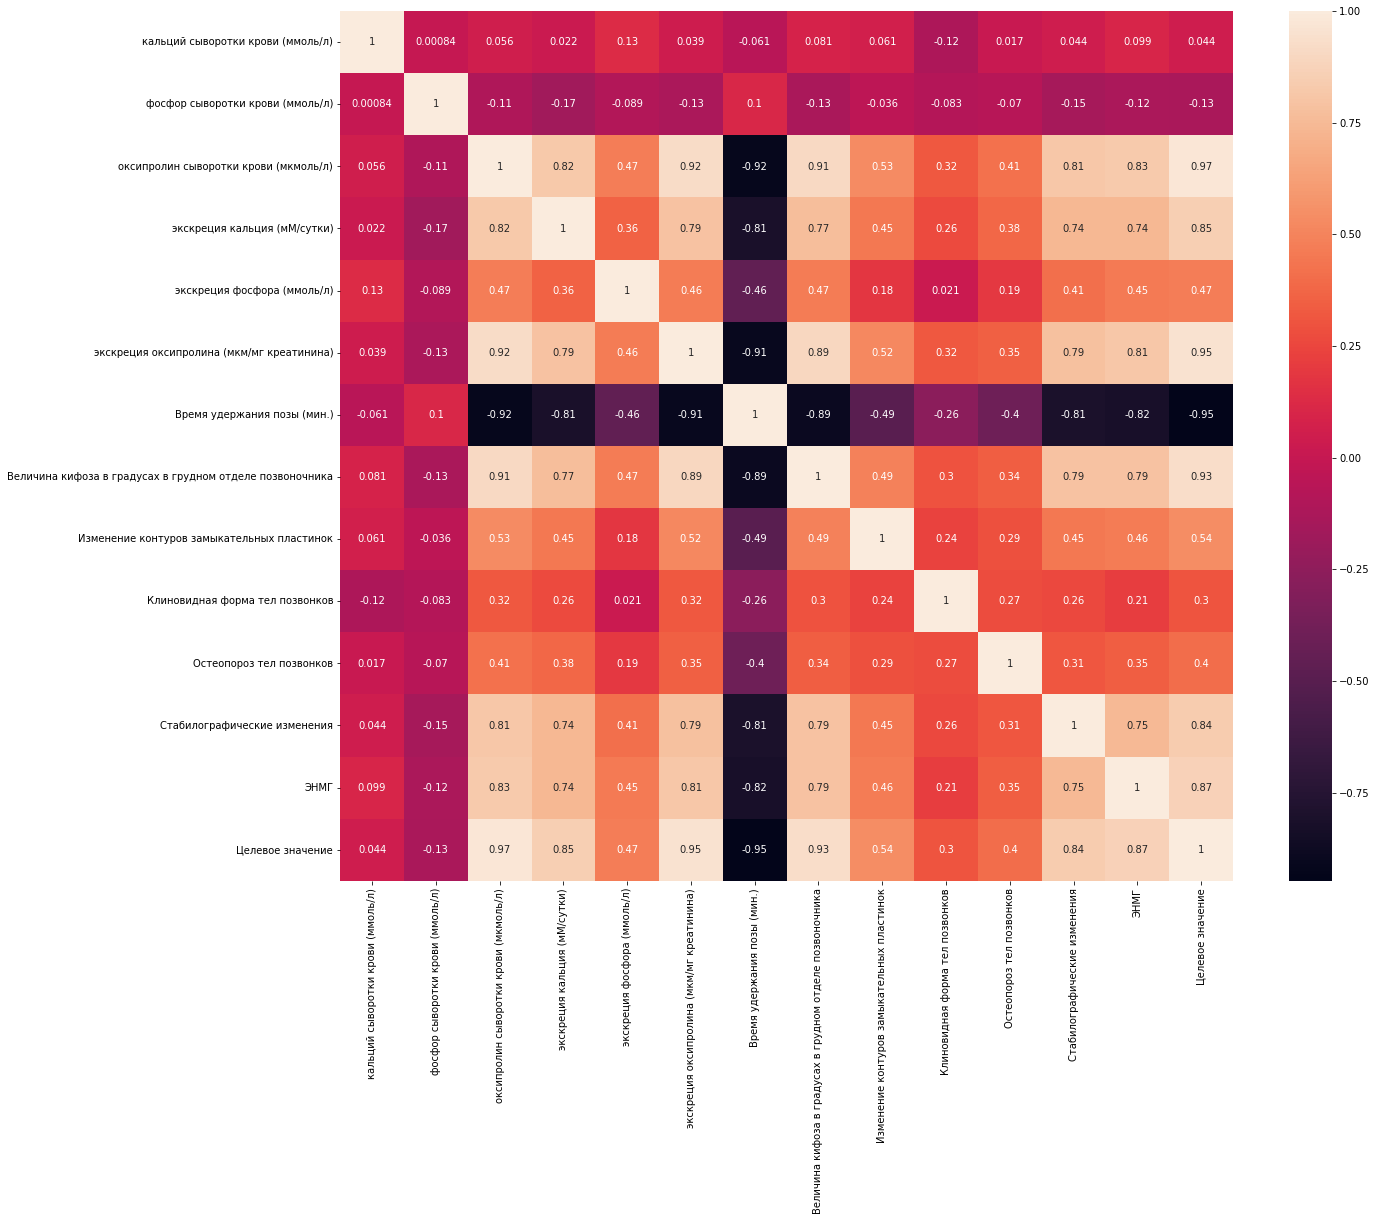

In [ ]:
plt.figure(figsize=(20, 16))
corr_matrix = everyone.corr()
sn.heatmap(corr_matrix, annot=True)

## Вклад каждого признака в целевое значение

In [ ]:
fs = feature_selection.mutual_info_classif(everyone.values[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]], list(everyone.values[:,13]))
fs

array([0.08570354, 0.05326222, 0.63663191, 0.5899159 , 0.42190924,
       0.63663191, 0.63663191, 0.61191225, 0.18734833, 0.05794468,
       0.14576491, 0.37862259, 0.41708636])

In [ ]:
everyone.values[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]]

array([[ 2.2 ,  1.4 , 24.9 , ...,  1.  ,  1.  ,  1.  ],
       [ 2.67,  1.56, 25.01, ...,  1.  ,  1.  ,  1.  ],
       [ 2.1 ,  1.34, 25.7 , ...,  1.  ,  1.  ,  1.  ],
       ...,
       [ 2.2 ,  1.6 , 15.3 , ...,  0.  ,  0.  ,  0.  ],
       [ 2.2 ,  1.4 , 15.3 , ...,  0.  ,  0.  ,  0.  ],
       [ 2.4 ,  1.47, 15.3 , ...,  0.  ,  0.  ,  0.  ]])

In [ ]:
np.array(everyone.values[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]]).shape

(302, 13)

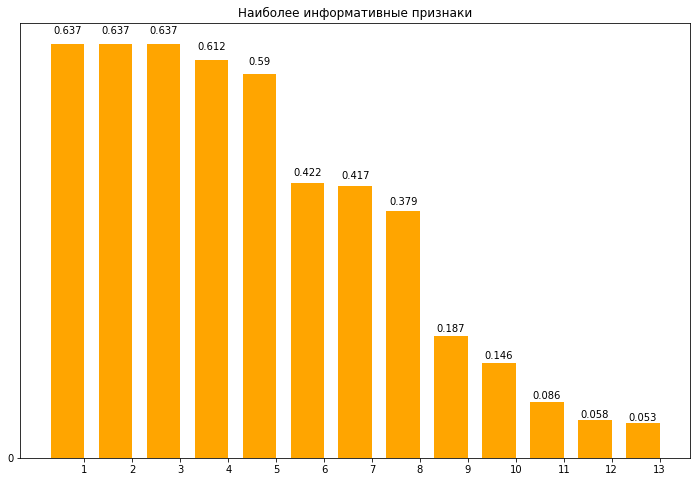

In [ ]:
everyone_fs = {everyone.columns[i]:fs[i] for i in range(13)}
significant = sorted(everyone_fs.items(), key=lambda value: value[1], reverse=True)
names = [i+1 for i in range(len(significant))]

main = list(map(float, np.array(significant)[:, 1]))

width = 0.7

x = np.arange(len(names))

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax.set_yticks(np.arange(0, 100, step=4))
bar = plt.bar(x - width/2, main, width, label='Основная группа', color='orange')
ax.set_title('Наиболее информативные признаки')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=0)

for i in bar:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width() / 2, height*1.02, str(round(height, 3)), ha="center", va="bottom", fontsize=10)

## Сравнение показателей у здоровых и больных людей

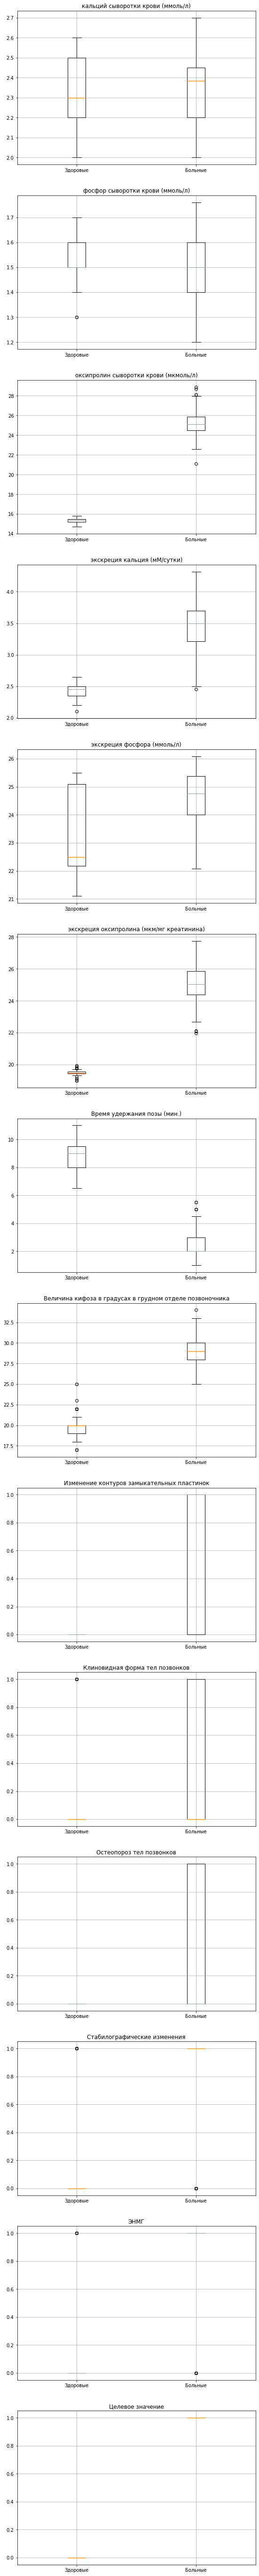

In [ ]:
plt.figure(figsize=(20, 100))
for i in range(len(everyone.columns)):
        plt.subplot(len(everyone.columns), 2, 2*i+1)
        plt.title(all_healthy.columns[i])
        plt.grid(True, which='both')
        plt.boxplot([all_healthy[all_healthy.columns[i]] ,all_sick[all_sick.columns[i]]], labels=['Здоровые','Больные'])

## Понижение размероности признакового пространства

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=3)
pca.fit(everyone.values)
everyone_transformed = pca.transform(everyone.values[:-1])
everyone_transformed

array([[-7.61688207e+00, -2.85581430e+00,  1.11447236e+00],
       [-5.36924943e+00,  3.58423605e-01, -3.01779456e-01],
       [-4.97971658e+00,  1.33817005e+00, -2.78469117e-02],
       [-3.83269772e+00,  6.92692433e-01,  1.52299422e+00],
       [-5.36819422e+00,  2.86464392e+00,  7.53426055e-01],
       [-5.21286914e+00, -1.05653412e+00,  5.68449875e-01],
       [-5.74907109e+00,  3.86955104e-01,  1.35246798e+00],
       [-7.34127241e+00, -3.57822994e+00,  1.50650556e-01],
       [-2.75449244e+00, -1.56868129e+00,  3.68191345e-01],
       [-2.49555758e+00,  7.06383348e-01, -8.35605688e-01],
       [-2.51660194e+00,  2.06924926e+00, -1.16550852e+00],
       [-2.25134453e+00,  2.95510509e+00,  2.52046564e-01],
       [-3.60566369e+00,  4.12244241e-01,  4.19435083e-01],
       [-5.65468461e+00,  5.20936036e-01, -8.75040163e-01],
       [-4.33724835e+00,  8.84852090e-01, -4.48199495e-01],
       [-2.65434722e+00,  8.85042660e-01, -1.62700682e+00],
       [-5.77161654e+00, -1.54641135e+00

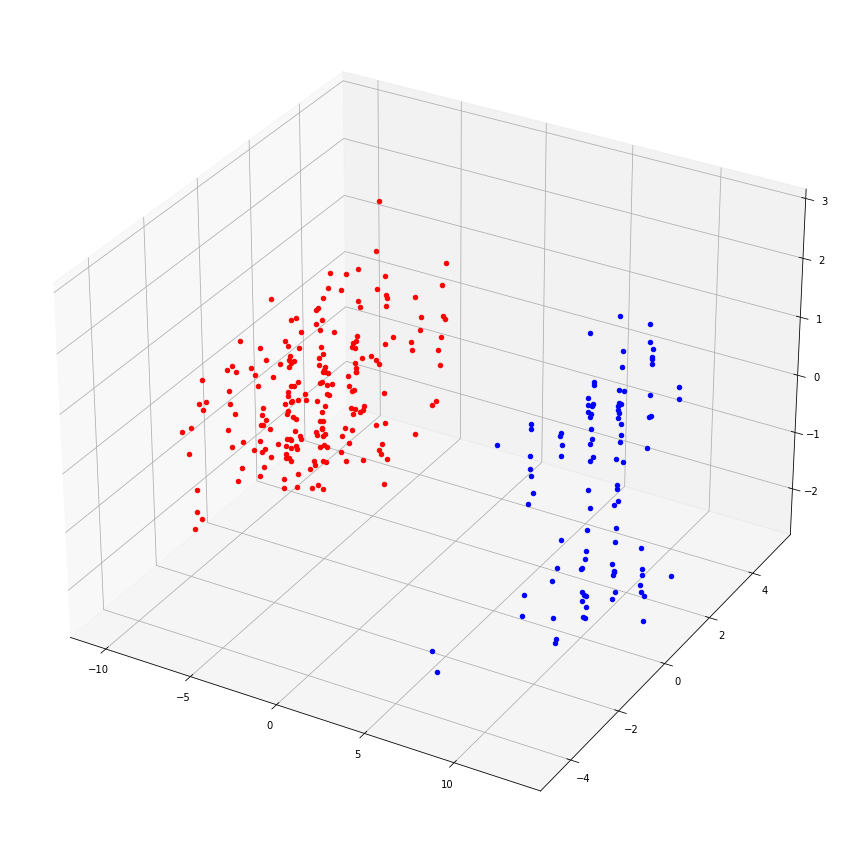

In [ ]:
fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(projection='3d')
for i in range(len(everyone_transformed)):
    ax.scatter(everyone_transformed[:, 0][i], everyone_transformed[:, 1][i], everyone_transformed[:, 2][i], marker='o', color='r' if everyone_transformed[:, 0][i] < 0 else 'b')

In [ ]:
pca = PCA(n_components=2)
pca.fit(everyone.values)
everyone_transformed = pca.transform(everyone.values[:-1])
everyone_transformed

array([[-7.61688207e+00, -2.85581430e+00],
       [-5.36924943e+00,  3.58423605e-01],
       [-4.97971658e+00,  1.33817005e+00],
       [-3.83269772e+00,  6.92692433e-01],
       [-5.36819422e+00,  2.86464392e+00],
       [-5.21286914e+00, -1.05653412e+00],
       [-5.74907109e+00,  3.86955104e-01],
       [-7.34127241e+00, -3.57822994e+00],
       [-2.75449244e+00, -1.56868129e+00],
       [-2.49555758e+00,  7.06383348e-01],
       [-2.51660194e+00,  2.06924926e+00],
       [-2.25134453e+00,  2.95510509e+00],
       [-3.60566369e+00,  4.12244241e-01],
       [-5.65468461e+00,  5.20936036e-01],
       [-4.33724835e+00,  8.84852090e-01],
       [-2.65434722e+00,  8.85042660e-01],
       [-5.77161654e+00, -1.54641135e+00],
       [-6.62601640e+00, -2.47780255e+00],
       [-4.95514437e+00,  8.98387686e-02],
       [-4.56777452e+00, -1.93003182e-01],
       [-4.09316834e+00, -1.53479534e+00],
       [-4.38634812e+00, -1.59398394e+00],
       [-5.50135442e+00, -2.04288986e+00],
       [-5.

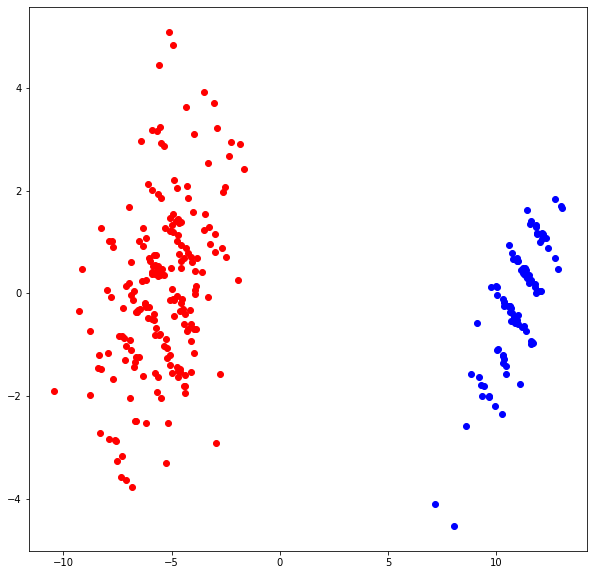

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(len(everyone_transformed)):
    plt.scatter(everyone_transformed[:, 0][i], everyone_transformed[:, 1][i], color='b' if everyone_transformed[:, 0][i]  > 0 else 'r')

## Показатели больных через 3 года лечения

In [ ]:
# 0 - Основная группа, 1 - группа сравнения
main_group_3 = sick_3_years[sick_3_years['Целевое значение'] == 1]
comparison_group_3 = sick_3_years[sick_3_years['Целевое значение'] == 0]

In [ ]:
sick_3_years.corr()

,Время удержания позы (мин.),Величина кифоза в градусах в грудном отделе позвоночника,Изменение контуров замыкательных пластинок,Клиновидная форма тел позвонков,Остеопороз тел позвонков,Уменьшение высоты межпозвонкового диска,Изменение контуров апофизов,Признаки остеохондроза,Стабилографические изменения,ЭНМГ,Целевое значение
Время удержания позы (мин.),1.000000,-0.778780,-0.231286,-0.572336,-0.142544,-0.694598,-0.261340,-0.275436,-0.541839,-0.668117,-0.915450
Величина кифоза в градусах в грудном отделе позвоночника,-0.778780,1.000000,0.242743,0.535388,0.089009,0.664639,0.290741,0.268319,0.468733,0.717436,0.868527
Изменение контуров замыкательных пластинок,-0.231286,0.242743,1.000000,0.157693,0.085898,0.276622,0.130485,0.157864,0.111529,0.235425,0.298240
Клиновидная форма тел позвонков,-0.572336,0.535388,0.157693,1.000000,0.186330,0.426590,0.171024,0.221887,0.297816,0.546099,0.630425
Остеопороз тел позвонков,-0.142544,0.089009,0.085898,0.186330,1.000000,0.141473,0.131410,0.148425,-0.004975,0.189168,0.158486
Уменьшение высоты межпозвонкового диска,-0.694598,0.664639,0.276622,0.426590,0.141473,1.000000,0.233080,0.250116,0.490230,0.573960,0.725050
Изменение контуров апофизов,-0.261340,0.290741,0.130485,0.171024,0.131410,0.233080,1.000000,0.852867,0.126633,0.241249,0.315188
Признаки остеохондроза,-0.275436,0.268319,0.157864,0.221887,0.148425,0.250116,0.852867,1.000000,0.140863,0.288204,0.334601
Стабилографические изменения,-0.541839,0.468733,0.111529,0.297816,-0.004975,0.490230,0.126633,0.140863,1.000000,0.467216,0.542392
ЭНМГ,-0.668117,0.717436,0.235425,0.546099,0.189168,0.573960,0.241249,0.288204,0.467216,1.000000,0.792429


In [ ]:
pca = PCA(n_components=3)
pca.fit(main_group_3.values)
main_group_3_transformed = pca.transform(main_group_3.values[:-1])
main_group_3_transformed

array([[-4.70572517e+00, -5.88600666e-01,  1.11683213e+00],
       [ 2.86440133e-01, -9.54612371e-01,  1.21393024e+00],
       [-6.67046378e+00,  2.57307449e-02,  1.06429285e+00],
       [ 3.53213391e-01,  1.59117931e-01,  1.05100631e+00],
       [ 1.28927548e+00, -8.82591743e-01,  1.13330529e+00],
       [-5.63361689e+00,  5.33024226e-01,  1.00544717e+00],
       [-4.69505376e+00, -6.47320314e-01, -2.17993535e-01],
       [ 3.55714426e-01,  2.04830651e-02, -2.54733375e-01],
       [ 3.47261548e+00,  1.79231383e+00, -3.81365386e-01],
       [ 2.47634742e+00,  1.87806389e+00, -7.62440220e-01],
       [ 5.35620822e+00, -2.10283549e-01, -5.36684605e-01],
       [-6.64185337e+00,  5.13004349e-01, -3.27830193e-01],
       [ 4.13397138e-01,  1.12653014e+00, -1.70739769e-01],
       [ 3.51654182e-01,  1.47138183e-01, -9.60339776e-02],
       [ 5.41599387e+00,  8.42856028e-01,  1.25204252e+00],
       [ 5.41599387e+00,  8.42856028e-01,  1.25204252e+00],
       [ 1.04018790e+01,  5.85690575e-01

In [ ]:
pca = PCA(n_components=3)
pca.fit(comparison_group_3.values)
comparison_group_3_transformed = pca.transform(comparison_group_3.values[:-1])
comparison_group_3_transformed

array([[-3.61777024e+00,  6.67756891e-01,  1.24991478e-01],
       [-4.67432036e+00, -1.95476187e-01,  6.81639923e-01],
       [-1.60407083e+00,  7.01602540e-01, -5.63666417e-01],
       [-1.60407083e+00,  7.01602540e-01, -5.63666417e-01],
       [ 1.50110662e+00,  2.48861391e+00, -4.00496891e-01],
       [-3.73047914e+00, -1.29432550e+00, -3.64722356e-02],
       [-6.58003135e+00,  9.04875503e-01,  1.02242461e+00],
       [-1.64623207e+00, -4.27401832e-01,  3.06586868e-01],
       [ 3.13127213e-01, -4.87261213e-01,  6.84482945e-01],
       [-2.71426925e+00, -1.20212285e+00, -7.25698735e-01],
       [-1.62751169e+00, -2.76842172e-01, -3.83208236e-01],
       [-2.65791480e+00, -2.21081650e-01, -6.44966878e-01],
       [-4.59653937e+00,  8.76673556e-01, -5.65372230e-01],
       [-1.70529268e+00, -1.34899191e+00,  8.63803918e-01],
       [ 3.34630834e+00, -7.28862419e-01,  1.14052046e+00],
       [ 5.30415447e+00, -1.85324307e+00,  3.92363792e-01],
       [ 3.33261630e+00, -7.58084345e-01

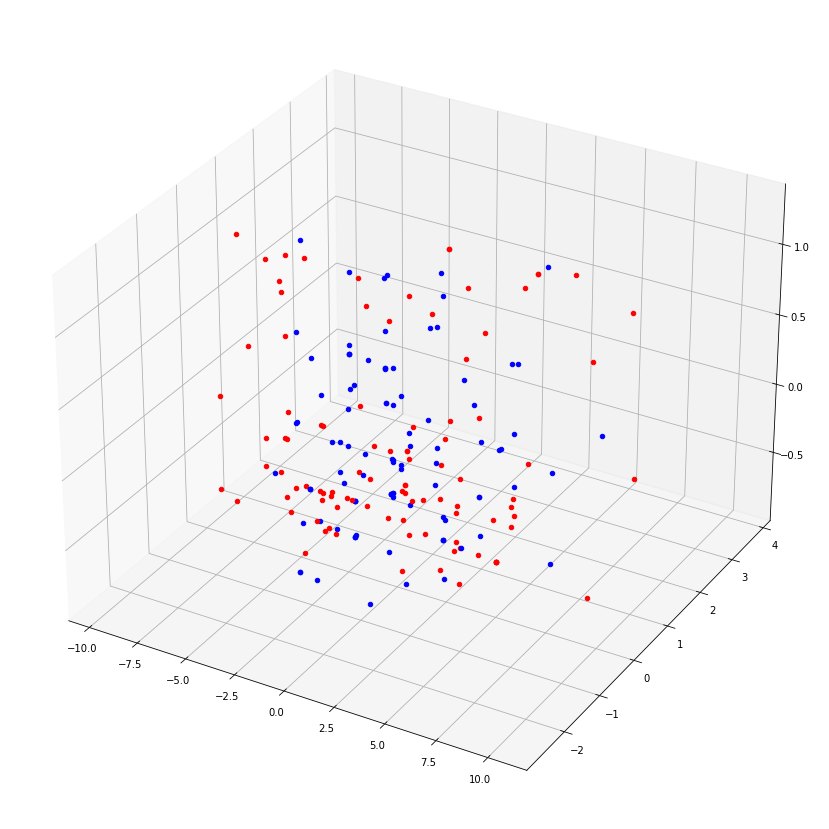

In [ ]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')
for i in range(len(comparison_group_3_transformed)):
    ax.scatter(comparison_group_3_transformed[:, 0][i], comparison_group_3_transformed[:, 1][i], comparison_group_3_transformed[:, 2][i], marker='o', color='b')
for i in range(len(main_group_3_transformed)):
    ax.scatter(main_group_3_transformed[:, 0][i], main_group_3_transformed[:, 1][i], main_group_3_transformed[:, 2][i], marker='o', color='r')

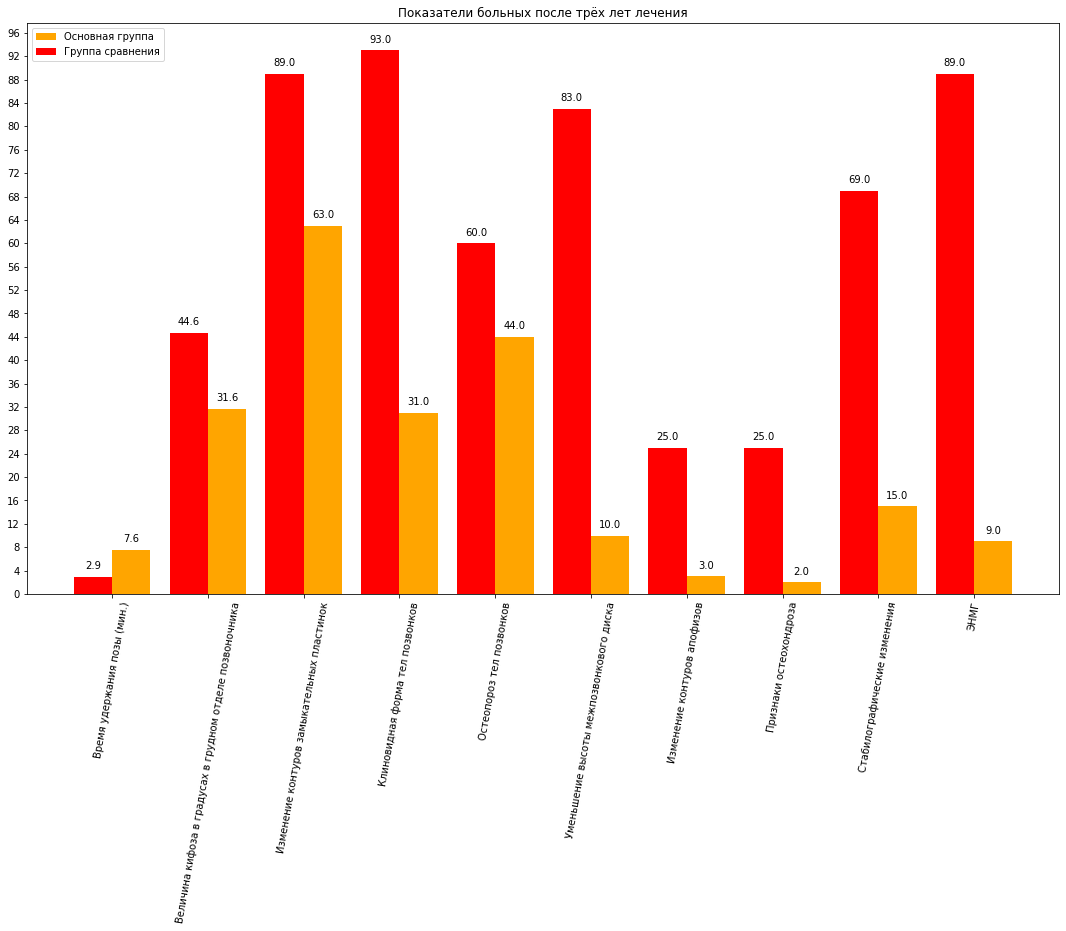

In [ ]:

names = sick_3_years.columns[:-1]

main3 = [np.mean(main_group_3.values[:, i]) if not set(main_group_3.values[:, i]).issubset(set([0,1])) else np.sum(main_group_3.values[:, i]) for i in range(len(main_group_3.columns[:-1]))] 
comparison3 = [np.mean(comparison_group_3.values[:, i]) if not set(comparison_group_3.values[:, i]).issubset(set([0,1])) else np.sum(comparison_group_3.values[:, i]) for i in range(len(comparison_group_3.columns[:-1]))]

width = 0.4

x = np.arange(len(names))

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.set_yticks(np.arange(0, 100, step=4))
comparison3_bar = plt.bar(x + width/2, comparison3, width, label='Основная группа', color='orange')
main3_bar = plt.bar(x - width/2, main3, width, label='Группа сравнения', color='r')
ax.set_title('Показатели больных после трёх лет лечения')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=80)
plt.legend(loc = 'upper left')

for i in comparison3_bar:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width() / 2, height+1, str(round(height, 1)), ha="center", va="bottom", fontsize=10)
    
for i in main3_bar:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width() / 2, height+1, str(round(height, 1)), ha="center", va="bottom", fontsize=10)


## Показатели больных через 7 лет лечения

In [ ]:
# 0 - Основная группа, 1 - группа сравнения
main_group_7 = sick_7_years[sick_7_years['Целевое значение'] == 1]
comparison_group_7 = sick_7_years[sick_7_years['Целевое значение'] == 0]

In [ ]:
sick_7_years.corr()

,Время удержания позы (мин.),Величина кифоза в градусах в грудном отделе позвоночника,Изменение контуров замыкательных пластинок,Клиновидная форма тел позвонков,Грыжи Шморля,Остеопороз тел позвонков,Уменьшение высоты межпозвонкового диска,Изменение контуров апофизов,Признаки остеохондроза,Стабилографические изменения,ЭНМГ,Целевое значение
Время удержания позы (мин.),1.000000,-0.833512,-0.462788,-0.675255,-0.892800,-0.252629,-0.865786,-0.738757,-0.783005,-0.488396,-0.628354,-0.948341
Величина кифоза в градусах в грудном отделе позвоночника,-0.833512,1.000000,0.382742,0.682203,0.840478,0.176533,0.816355,0.750053,0.787931,0.481142,0.520938,0.904732
Изменение контуров замыкательных пластинок,-0.462788,0.382742,1.000000,0.288335,0.449078,0.129198,0.506172,0.419215,0.427195,0.276079,0.269378,0.481360
Клиновидная форма тел позвонков,-0.675255,0.682203,0.288335,1.000000,0.679382,0.268162,0.657909,0.610036,0.646276,0.345347,0.467802,0.728219
Грыжи Шморля,-0.892800,0.840478,0.449078,0.679382,1.000000,0.197312,0.844717,0.751146,0.791339,0.430793,0.528809,0.932936
Остеопороз тел позвонков,-0.252629,0.176533,0.129198,0.268162,0.197312,1.000000,0.229325,0.128605,0.153548,0.006398,0.151992,0.239046
Уменьшение высоты межпозвонкового диска,-0.865786,0.816355,0.506172,0.657909,0.844717,0.229325,1.000000,0.716574,0.763470,0.450140,0.566612,0.905439
Изменение контуров апофизов,-0.738757,0.750053,0.419215,0.610036,0.751146,0.128605,0.716574,1.000000,0.920776,0.367766,0.428688,0.804508
Признаки остеохондроза,-0.783005,0.787931,0.427195,0.646276,0.791339,0.153548,0.763470,0.920776,1.000000,0.392103,0.457243,0.847588
Стабилографические изменения,-0.488396,0.481142,0.276079,0.345347,0.430793,0.006398,0.450140,0.367766,0.392103,1.000000,0.554792,0.504715


In [ ]:
pca = PCA(n_components=3)
pca.fit(main_group_7.values)
main_group_7_transformed = pca.transform(main_group_7.values[:-1])
main_group_7_transformed

array([[-1.87495519e-01, -1.28372253e+00, -9.41688746e-01],
       [-6.61203964e-02, -3.07123450e-01, -8.55126094e-01],
       [-1.92856350e+00,  9.18153798e-01, -7.62511912e-01],
       [-1.92856350e+00,  9.18153798e-01, -7.62511912e-01],
       [-5.44217759e-02, -3.58895463e-01, -1.37191253e-01],
       [-8.03523399e-02, -4.72401252e-01,  4.72404525e-01],
       [-2.06185530e+00, -2.10599678e-01,  5.54341892e-01],
       [-7.80370745e-02, -4.59277849e-01,  5.48290362e-01],
       [ 5.12425873e+00,  8.72224878e-01,  7.06286841e-01],
       [ 7.10576168e+00,  6.10423304e-01,  6.24349474e-01],
       [-1.10052897e-01, -5.53035722e-01,  6.98722249e-01],
       [-2.09155585e+00, -2.91234148e-01,  7.80659616e-01],
       [ 1.46929291e-01,  1.56544023e+00, -4.55683066e-01],
       [ 5.52547259e-02,  6.69475627e-01, -7.68563442e-01],
       [ 5.13617540e+00,  1.02437928e+00, -6.97129615e-01],
       [ 1.02170961e+01,  1.37928293e+00, -6.25695788e-01],
       [ 1.51766416e+01,  7.57587498e-01

In [ ]:
pca = PCA(n_components=3)
pca.fit(comparison_group_7.values)
comparison_group_7_transformed = pca.transform(comparison_group_7.values[:-1])
comparison_group_7_transformed

array([[-1.01949815e+00, -5.32136684e-01,  7.36605258e-01],
       [-6.02983039e+00,  5.29493802e-01,  5.21127347e-01],
       [-9.99329670e-01, -9.88587640e-01,  9.28409709e-02],
       [ 3.95245397e+00, -1.39892654e-01, -1.22510961e-01],
       [-3.03449100e+00, -2.90386985e-01, -2.64709769e-01],
       [-1.05838948e+00,  2.09062351e-01,  4.19682749e-01],
       [-6.03259806e+00,  1.48665578e+00, -4.33060131e-01],
       [-1.06115715e+00,  1.16622432e+00, -5.34504729e-01],
       [-1.01970975e+00,  2.66390234e-01,  7.81159179e-01],
       [-6.00945032e+00, -7.25484073e-01, -1.67190861e-01],
       [-9.63206007e-01, -7.72624702e-01, -5.44423998e-01],
       [-9.99329670e-01, -9.88587640e-01,  9.28409709e-02],
       [-6.02889598e+00, -3.54884555e-01, -3.25652116e-01],
       [-1.00303175e+00,  8.52952690e-01, -1.45670442e-02],
       [ 1.99137323e+00,  9.17450261e-01,  4.63753024e-02],
       [ 1.97213917e+00,  4.89522860e-01, -1.56639874e-01],
       [-1.01949815e+00, -5.32136684e-01

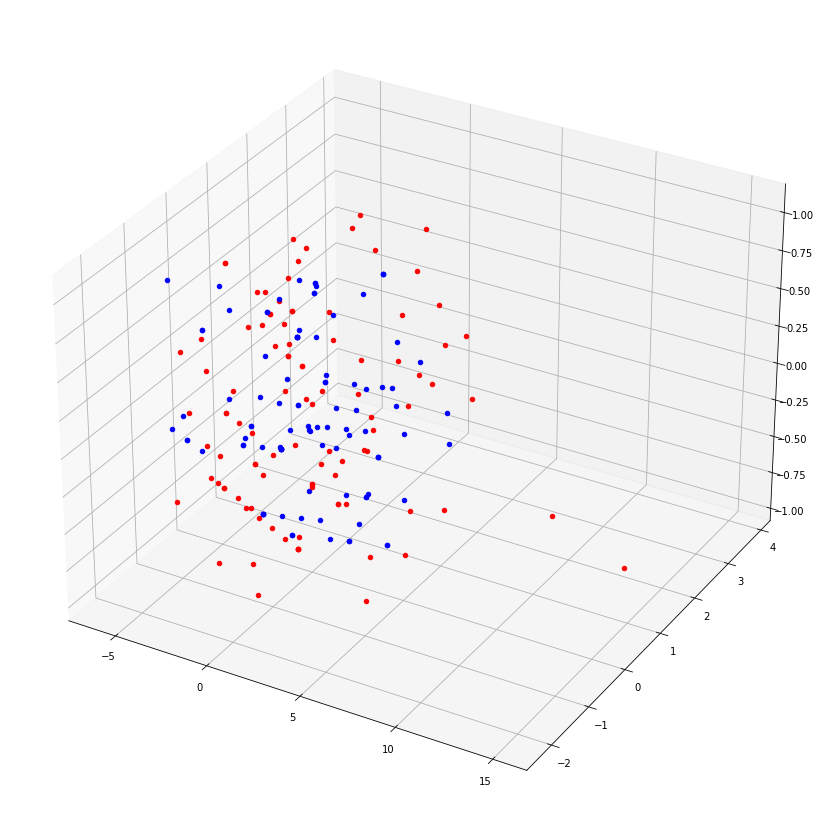

In [ ]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')
for i in range(len(comparison_group_7_transformed)):
    ax.scatter(comparison_group_7_transformed[:, 0][i], comparison_group_7_transformed[:, 1][i], comparison_group_7_transformed[:, 2][i], marker='o', color='b')
for i in range(len(main_group_7_transformed)):
    ax.scatter(main_group_7_transformed[:, 0][i], main_group_7_transformed[:, 1][i], main_group_7_transformed[:, 2][i], marker='o', color='r')

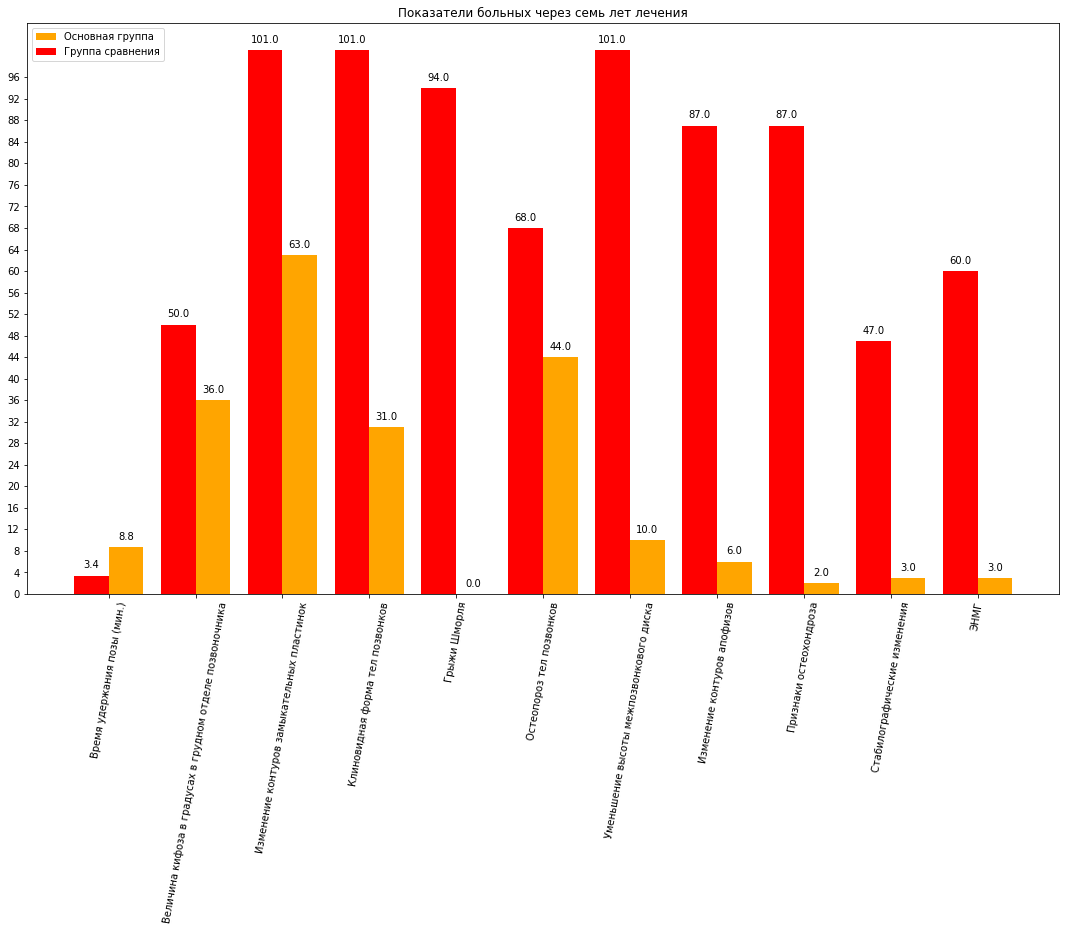

In [ ]:
names = sick_7_years.columns[:-1]

main7 = [np.mean(main_group_7.values[:, i]) if not set(main_group_7.values[:, i]).issubset(set([0,1])) else np.sum(main_group_7.values[:, i]) for i in range(len(main_group_7.columns[:-1]))] 
comparison7 = [np.mean(comparison_group_7.values[:, i]) if not set(comparison_group_7.values[:, i]).issubset(set([0,1])) else np.sum(comparison_group_7.values[:, i]) for i in range(len(comparison_group_7.columns[:-1]))]

width = 0.4

x = np.arange(len(names))

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.set_yticks(np.arange(0, 100, step=4))
comparison7_bar = plt.bar(x + width/2, comparison7, width, label='Основная группа', color='orange')
main7_bar = plt.bar(x - width/2, main7, width, label='Группа сравнения', color='r')

ax.set_title('Показатели больных через семь лет лечения')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=80)
plt.legend(loc = 'upper left')

for i in main7_bar:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width() / 2, height+1, str(round(height, 1)), ha="center", va="bottom", fontsize=10)
for i in comparison7_bar:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width() / 2, height+1, str(round(height, 1)), ha="center", va="bottom", fontsize=10)

## Исследование показателей лабораторных анализов крови

In [ ]:
blood_analysis = everyone[['кальций сыворотки крови (ммоль/л)','фосфор сыворотки крови (ммоль/л)','оксипролин сыворотки крови (мкмоль/л)','экскреция кальция (мМ/сутки)', 'экскреция фосфора (ммоль/л)','экскреция оксипролина (мкм/мг креатинина)', 'Целевое значение']]
blood_analysis_healthy = blood_analysis[blood_analysis['Целевое значение'] == 0]
blood_analysis_sick = blood_analysis[blood_analysis['Целевое значение'] == 1]

In [ ]:
# Здоровые
pca = PCA(n_components=3)
pca.fit(blood_analysis_healthy.values)
blood_analysis_healthy_transformed = pca.transform(blood_analysis_healthy.values[:-1])
blood_analysis_healthy_transformed

array([[ 2.26207271,  0.35009628,  0.08404005],
       [ 1.06996808,  0.46922333, -0.1578313 ],
       [ 0.84490087, -0.24884266, -0.03570696],
       [ 1.75055976, -0.0863343 , -0.08840435],
       [-1.16175553, -0.18975115,  0.46652092],
       [ 1.05844339,  0.27089385,  0.16018781],
       [ 1.86280527,  0.38808512,  0.04363543],
       [-2.05492291, -0.25947585, -0.16988267],
       [ 1.24400396, -0.18445625,  0.27869826],
       [ 0.85790889,  0.09376525, -0.17225615],
       [-0.14675768, -0.08476942, -0.27643659],
       [-1.95917917, -0.08375388,  0.48684604],
       [ 1.84671124, -0.33475395, -0.29464569],
       [ 0.84426314, -0.08184387,  0.40966913],
       [ 1.86722994,  0.35441465, -0.1631302 ],
       [ 0.86616754,  0.4609735 ,  0.09546995],
       [-2.0376889 ,  0.35823608,  0.00738551],
       [-2.15304236, -0.1163523 , -0.0605889 ],
       [ 0.04769039, -0.1388214 ,  0.04863643],
       [ 0.84291443, -0.08594281,  0.52273272],
       [ 1.83845759, -0.27000337,  0.377

In [ ]:
# Больные
pca = PCA(n_components=3)
pca.fit(blood_analysis_sick.values)
blood_analysis_sick_transformed = pca.transform(blood_analysis_sick.values[:-1])
blood_analysis_sick_transformed

array([[ 3.24196827e-01,  1.22782500e+00,  5.55081701e-01],
       [ 8.12966552e-02,  9.85488634e-01, -7.65855864e-01],
       [-4.71661850e-01,  2.95273902e-01, -1.25370887e-01],
       [ 3.45946674e-01,  2.37926443e+00,  1.01285932e+00],
       [-1.33698145e+00, -6.42911518e-01,  1.02715023e+00],
       [ 6.65538997e-01,  2.27057534e-01,  5.35737274e-01],
       [ 5.96772566e-01, -1.18198597e+00,  1.43073639e+00],
       [ 1.78143916e+00, -1.97630645e+00,  2.41703707e-01],
       [ 2.10271745e+00,  1.87129213e+00,  2.16007296e-02],
       [ 6.47636987e-01,  4.30352912e-01, -5.30923453e-01],
       [-6.55859987e-02,  1.62572498e+00, -1.34000584e+00],
       [ 5.95000548e-01,  4.04257522e-01,  3.02573322e-01],
       [ 5.20138837e-01,  1.41343857e+00,  2.94620284e-01],
       [-3.95027528e-01, -1.34902000e-01, -8.48949363e-01],
       [-3.96949271e-01, -1.84227267e-01, -5.84442440e-03],
       [ 4.94501676e-01,  1.09597329e+00, -1.57464040e+00],
       [-5.63630976e-01,  1.52707502e+00

Text(0.5, 0, 'Z Label')

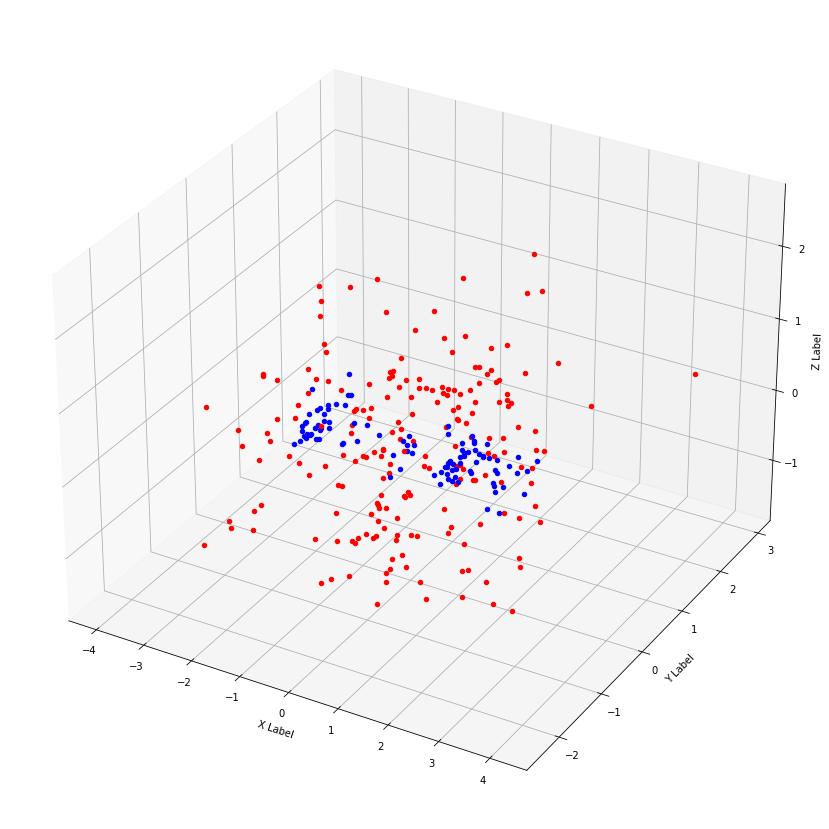

In [ ]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')
for i in range(len(blood_analysis_sick_transformed)):
    ax.scatter(blood_analysis_sick_transformed[:, 0][i], blood_analysis_sick_transformed[:, 1][i], blood_analysis_sick_transformed[:, 2][i], marker='o', color='r')
for i in range(len(blood_analysis_healthy_transformed)):
    ax.scatter(blood_analysis_healthy_transformed[:, 0][i], blood_analysis_healthy_transformed[:, 1][i], blood_analysis_healthy_transformed[:, 2][i], marker='o', color='b')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

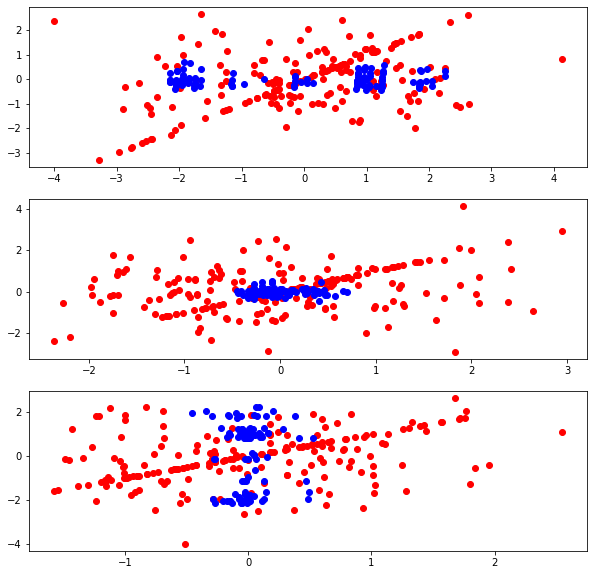

In [ ]:
plt.figure(figsize=(10, 10))
for j in range(3):
    plt.subplot(3,1,j+1)
    for i in range(len(blood_analysis_sick_transformed)):
        plt.scatter(blood_analysis_sick_transformed[:, j % 3][i], blood_analysis_sick_transformed[:, (j+i) % 3][i], color='r')
    for i in range(len(blood_analysis_healthy_transformed)):
        plt.scatter(blood_analysis_healthy_transformed[:, j % 3][i], blood_analysis_healthy_transformed[:, (j+1) % 3][i], color='b')


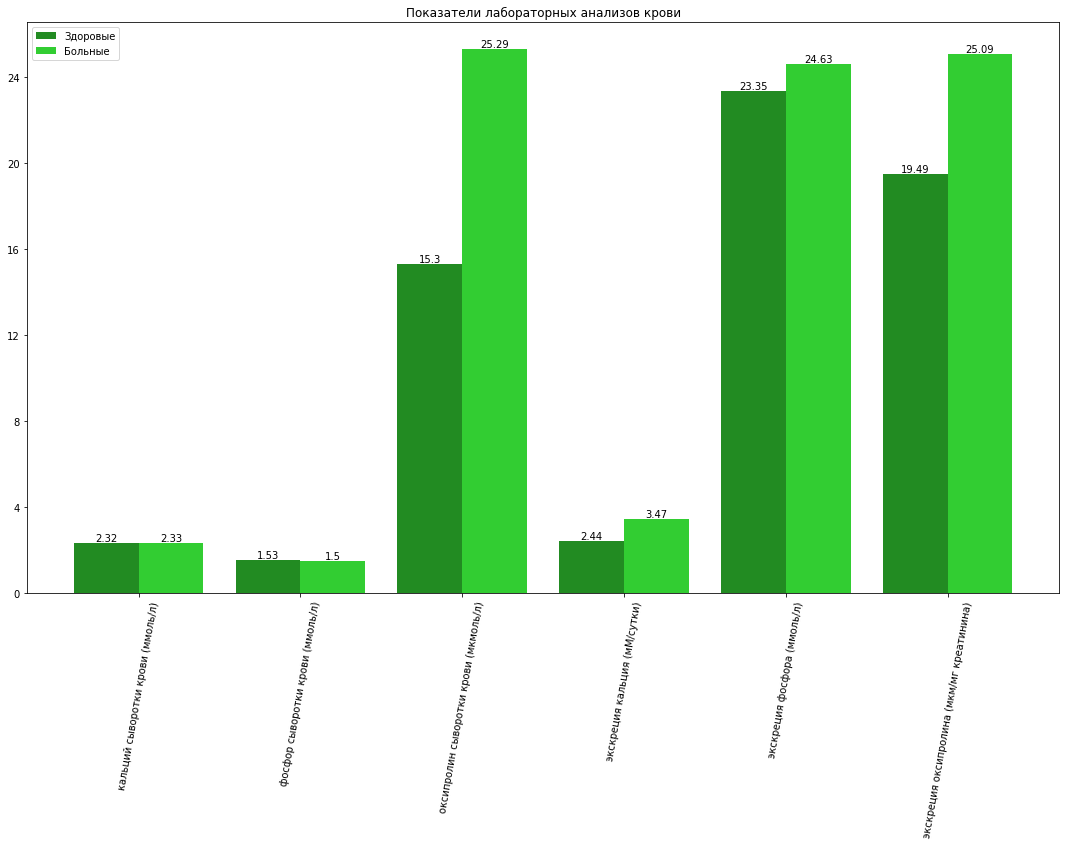

In [ ]:
names = blood_analysis.columns[:-1]

ba_h = [np.mean(blood_analysis_healthy.values[:, i]) for i in range(len(blood_analysis_healthy.columns[:-1]))] 
ba_s = [np.mean(blood_analysis_sick.values[:, i]) for i in range(len(blood_analysis_sick.columns[:-1]))]

width = 0.4

x = np.arange(len(names))

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.set_yticks(np.arange(0, 100, step=4))
ba_h_bar = plt.bar(x - width/2, ba_h, width, label='Здоровые', color='forestgreen')
ba_s_bar = plt.bar(x + width/2, ba_s, width, label='Больные', color='limegreen')
ax.set_title('Показатели лабораторных анализов крови')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=80)
plt.legend(loc = 'upper left')

for i in ba_h_bar:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width() / 2, height, str(round(height, 2)), ha="center", va="bottom", fontsize=10)
for i in ba_s_bar:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width() / 2, height, str(round(height, 2)), ha="center", va="bottom", fontsize=10)

## Исследования время удержания позы и стабилографических изменений

In [ ]:
Sample = everyone[['Время удержания позы (мин.)', 'Стабилографические изменения', 'Целевое значение']]
Sample_healthy = Sample[Sample['Целевое значение'] == 0]
Sample_sick = Sample[Sample['Целевое значение'] == 1]
Sample_sick

,Время удержания позы (мин.),Стабилографические изменения,Целевое значение
Номер,,,
1,1.0,1,1
2,1.0,1,1
3,2.0,1,1
4,2.0,1,1
5,2.0,1,1
...,...,...,...
198,2.5,1,1
199,3.0,1,1
200,2.5,1,1


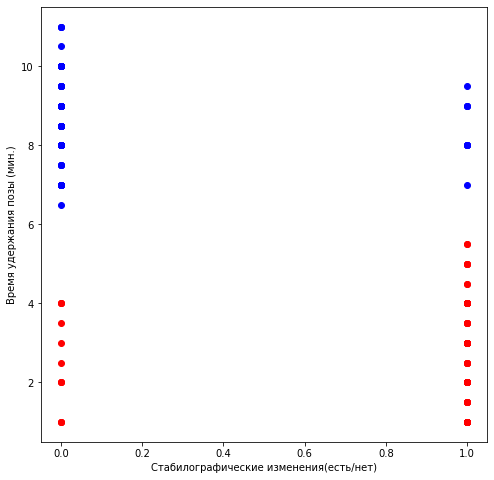

In [ ]:
plt.figure(figsize=(8,8))
plt.yticks()
plt.ylabel('Время удержания позы (мин.)')
plt.xlabel('Стабилографические изменения(есть/нет)')
for i in range(len(Sample_sick.values)):
    plt.scatter(Sample_sick.values[:, 1][i], Sample_sick.values[:, 0][i], color='r')
for i in range(len(Sample_healthy.values)):
    plt.scatter(Sample_healthy.values[:, 1][i], Sample_healthy.values[:, 0][i], color='b')


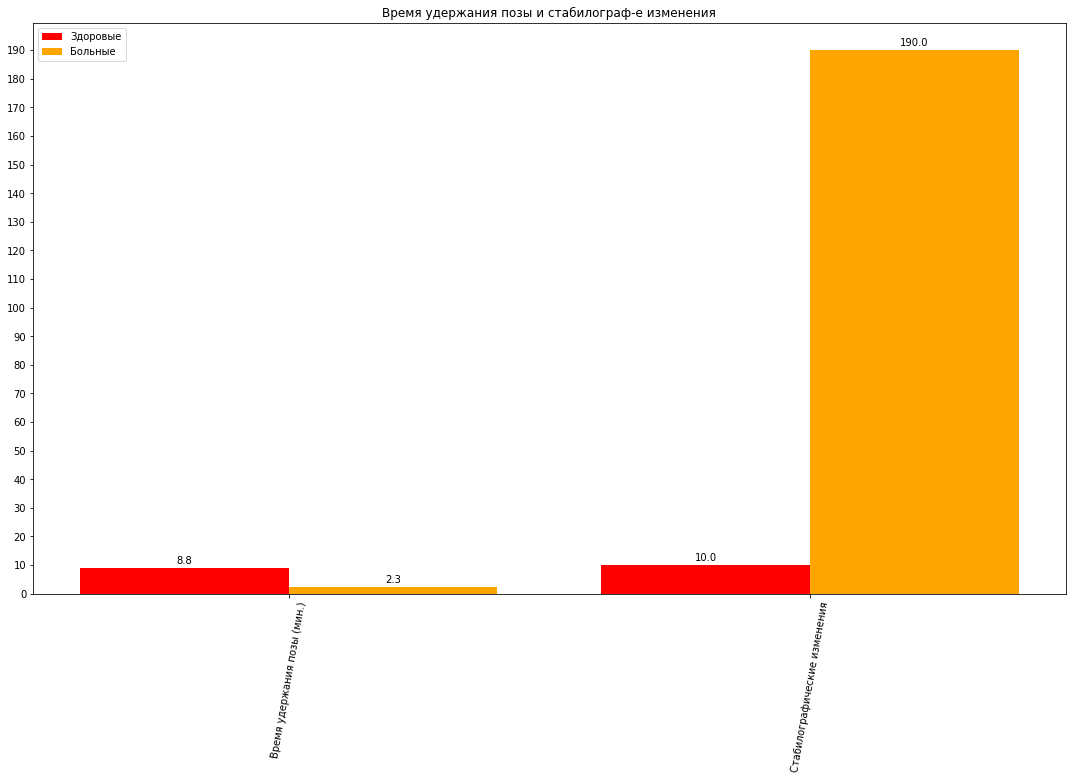

In [ ]:
names = Sample_sick.columns[:-1]

healthy = [np.mean(Sample_healthy.values[:, i]) if not set(Sample_healthy.values[:, i]).issubset(set([0,1])) else np.sum(Sample_healthy.values[:, i]) for i in range(len(Sample_healthy.columns[:-1]))] 
sick = [np.mean(Sample_sick.values[:, i]) if not set(Sample_sick.values[:, i]).issubset(set([0,1])) else np.sum(Sample_sick.values[:, i]) for i in range(len(Sample_sick.columns[:-1]))]

width = 0.4

x = np.arange(len(names))

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.set_yticks(np.arange(0, 200, step=10))
healthy_bar = plt.bar(x - width/2, healthy, width, label='Здоровые', color='r')
sick_bar = plt.bar(x + width/2, sick, width, label='Больные', color='orange')
ax.set_title('Время удержания позы и стабилограф-е изменения')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=80)
plt.legend(loc = 'upper left')

for i in healthy_bar:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width() / 2, height+1, str(round(height, 1)), ha="center", va="bottom", fontsize=10)
for i in sick_bar:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width() / 2, height+1, str(round(height, 1)), ha="center", va="bottom", fontsize=10)

## ЭНМГ и рентгенография

In [ ]:
radiography = everyone[['Величина кифоза в градусах в грудном отделе позвоночника', 'Изменение контуров замыкательных пластинок', 'Клиновидная форма тел позвонков', 'Остеопороз тел позвонков', 'ЭНМГ', 'Целевое значение']]
radiography_healthy = radiography[radiography['Целевое значение'] == 0]
radiography_sick = radiography[radiography['Целевое значение'] == 1]

In [ ]:
pca = PCA(n_components=3)
pca.fit(radiography_healthy.values)
radiography_healthy_transformed = pca.transform(radiography_healthy.values[:-1])
radiography_healthy_transformed

array([[ 0.30785786, -0.04191393, -0.10424374],
       [-0.69190473, -0.02595365, -0.08941058],
       [ 0.30785786, -0.04191393, -0.10424374],
       [-1.69166733, -0.00999337, -0.07457741],
       [-0.69190473, -0.02595365, -0.08941058],
       [-2.69142992,  0.00596692, -0.05974425],
       [ 0.31329453, -0.51842384,  0.77490855],
       [ 1.30762046, -0.05787421, -0.11907691],
       [ 2.30738305, -0.0738345 , -0.13391007],
       [ 0.30785786, -0.04191393, -0.10424374],
       [-0.69190473, -0.02595365, -0.08941058],
       [-1.69166733, -0.00999337, -0.07457741],
       [-0.69190473, -0.02595365, -0.08941058],
       [ 0.30785786, -0.04191393, -0.10424374],
       [ 0.30785786, -0.04191393, -0.10424374],
       [-0.67080506,  0.85307057,  0.38689943],
       [-1.67056766,  0.86903085,  0.40173259],
       [ 1.32872013,  0.82115001,  0.3572331 ],
       [ 0.32895753,  0.83711029,  0.37206627],
       [ 2.32848272,  0.80518972,  0.34239994],
       [ 0.31329453, -0.51842384,  0.774

In [ ]:
pca = PCA(n_components=3)
pca.fit(radiography_sick.values)
radiography_sick_transformed = pca.transform(radiography_sick.values[:-1])
radiography_sick_transformed

array([[ 3.74647391,  0.47418055, -0.23570339],
       [-0.24976616,  0.3987078 , -0.22023914],
       [-1.2366348 ,  0.97327013,  0.1254812 ],
       [-1.2366348 ,  0.97327013,  0.1254812 ],
       [-2.23569482,  0.95440194,  0.12934726],
       [ 0.80859092, -0.12456864,  0.52022197],
       [-0.20603745,  0.40454875, -0.31035915],
       [ 3.79020262,  0.48002151, -0.32582341],
       [-0.19046909, -0.14343682,  0.52408804],
       [-2.18858913, -0.1811732 ,  0.53182016],
       [-3.18764915, -0.20004139,  0.53568623],
       [-4.2182465 ,  0.36867998,  0.97152658],
       [-1.23325782, -0.16814596,  0.61807412],
       [-0.2341978 , -0.14927778,  0.61420805],
       [-1.23325782, -0.16814596,  0.61807412],
       [-2.23231784, -0.18701415,  0.62194018],
       [ 1.77611361,  0.48188911,  0.9483302 ],
       [ 2.77517363,  0.5007573 ,  0.94446413],
       [-0.2341978 , -0.14927778,  0.61420805],
       [-0.24976616,  0.3987078 , -0.22023914],
       [ 0.76148523,  1.0110065 ,  0.117

Text(0.5, 0, 'Z Label')

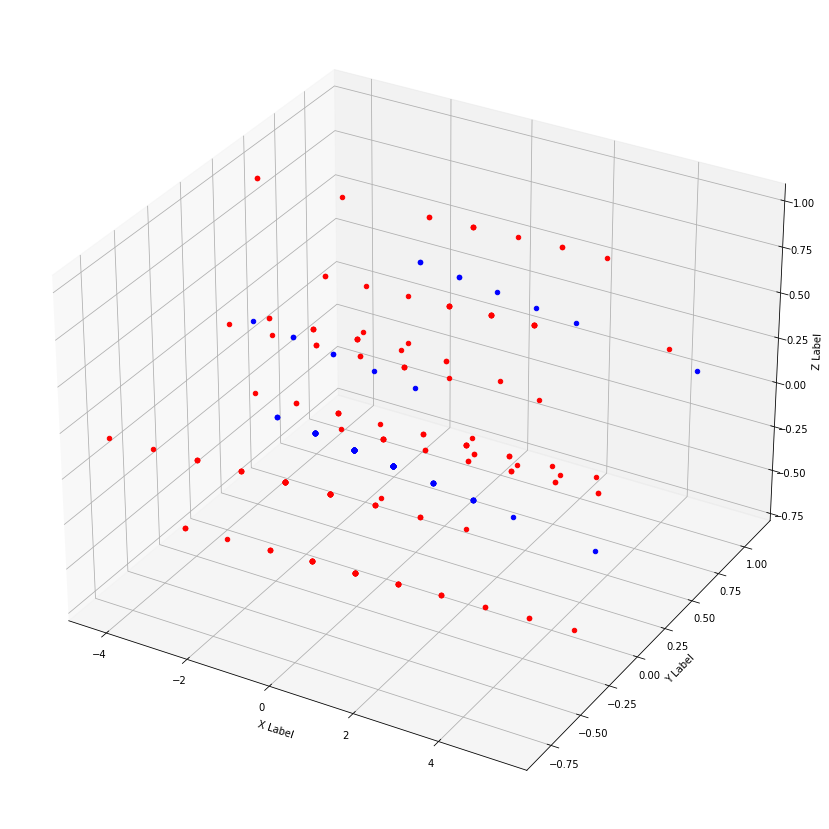

In [ ]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')
for i in range(len(radiography_sick_transformed)):
    ax.scatter(radiography_sick_transformed[:, 0][i], radiography_sick_transformed[:, 1][i], radiography_sick_transformed[:, 2][i], marker='o', color='r')
for i in range(len(radiography_healthy_transformed)):
    ax.scatter(radiography_healthy_transformed[:, 0][i], radiography_healthy_transformed[:, 1][i], radiography_healthy_transformed[:, 2][i], marker='o', color='b')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

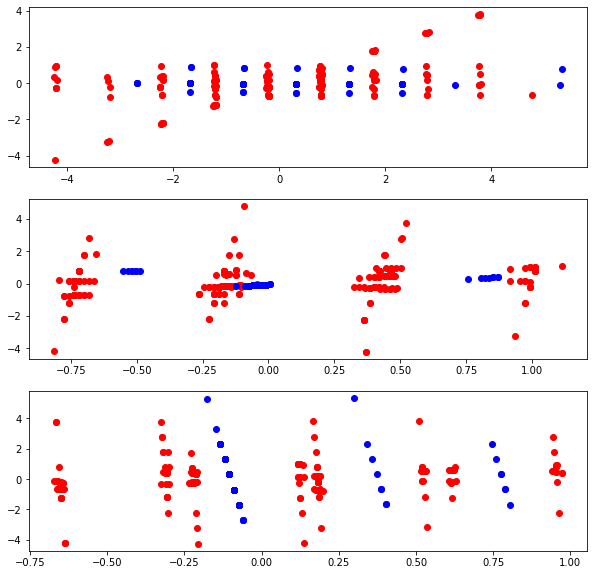

In [ ]:
plt.figure(figsize=(10, 10))
for j in range(3):
    plt.subplot(3,1,j+1)
    for i in range(len(radiography_sick_transformed)):
        plt.scatter(radiography_sick_transformed[:, j % 3][i], radiography_sick_transformed[:, (j+i) % 3][i], color='r')
    for i in range(len(radiography_healthy_transformed)):
        plt.scatter(radiography_healthy_transformed[:, j % 3][i], radiography_healthy_transformed[:, (j+1) % 3][i], color='b')


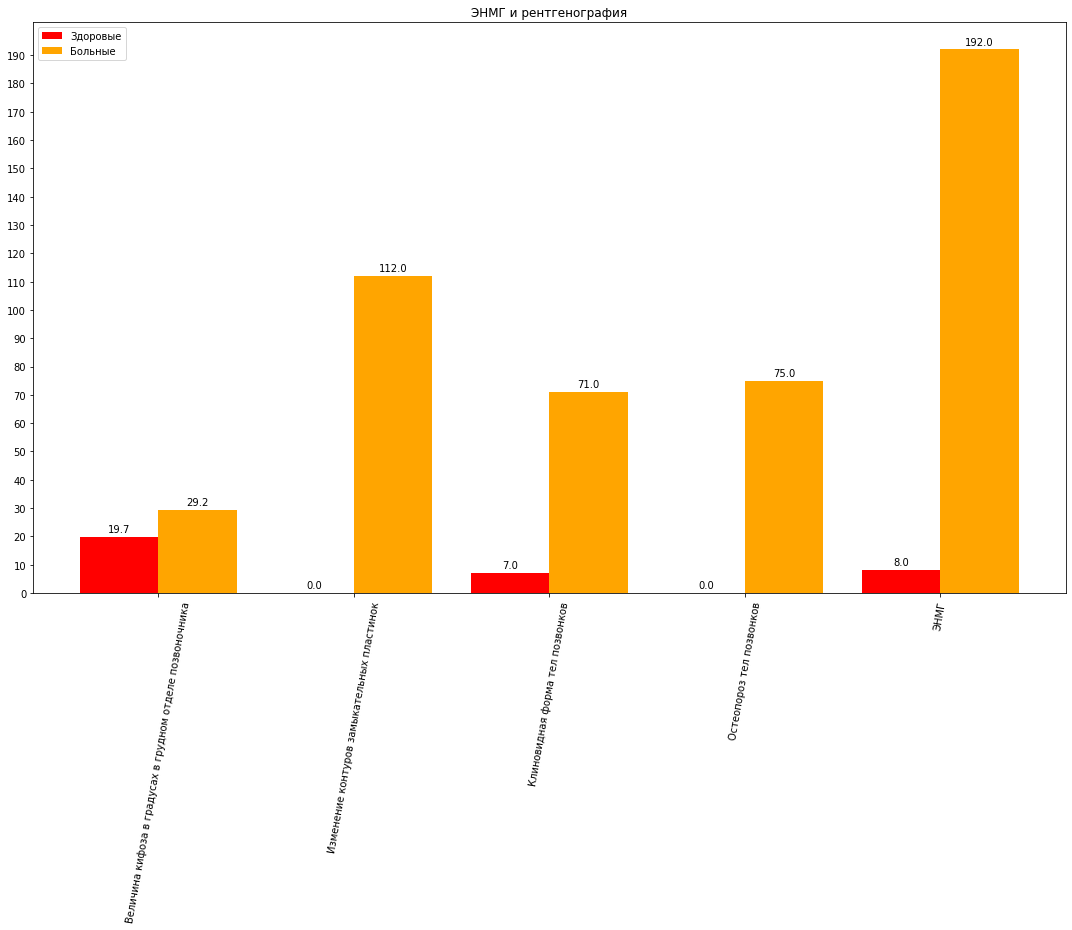

In [ ]:
names = radiography_healthy.columns[:-1]

r_healthy = [np.mean(radiography_healthy.values[:, i]) if not set(radiography_healthy.values[:, i]).issubset(set([0,1])) else np.sum(radiography_healthy.values[:, i]) for i in range(len(radiography_healthy.columns[:-1]))] 
r_sick = [np.mean(radiography_sick.values[:, i]) if not set(radiography_sick.values[:, i]).issubset(set([0,1])) else np.sum(radiography_sick.values[:, i]) for i in range(len(radiography_sick.columns[:-1]))]

width = 0.4

x = np.arange(len(names))

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.set_yticks(np.arange(0, 200, step=10))
r_healthy_bar = plt.bar(x - width/2, r_healthy, width, label='Здоровые', color='r')
r_sick_bar = plt.bar(x + width/2, r_sick, width, label='Больные', color='orange')
ax.set_title('ЭНМГ и рентгенография')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=80)
plt.legend(loc = 'upper left')

for i in r_healthy_bar:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width() / 2, height+1, str(round(height, 1)), ha="center", va="bottom", fontsize=10)
for i in r_sick_bar:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width() / 2, height+1, str(round(height, 1)), ha="center", va="bottom", fontsize=10)

# Выбор наиболее информативных переменных, коррелирующих с целевым значением

In [ ]:
from sklearn import linear_model

In [ ]:
time_target = pd.read_excel('/content/drive/MyDrive/course_work/model_data.xlsx').dropna()
#X = time_target[['оксипролин сыворотки крови (мкмоль/л)', 'экскреция кальция (мМ/сутки)','экскреция оксипролина (мкм/мг креатинина)', 'величина кифоза в градусах в грудном отделе позвоночника','время удержания позы (мин.)']].to_numpy()
#Y = time_target[['через 3 года']].to_numpy()

<Axes: >

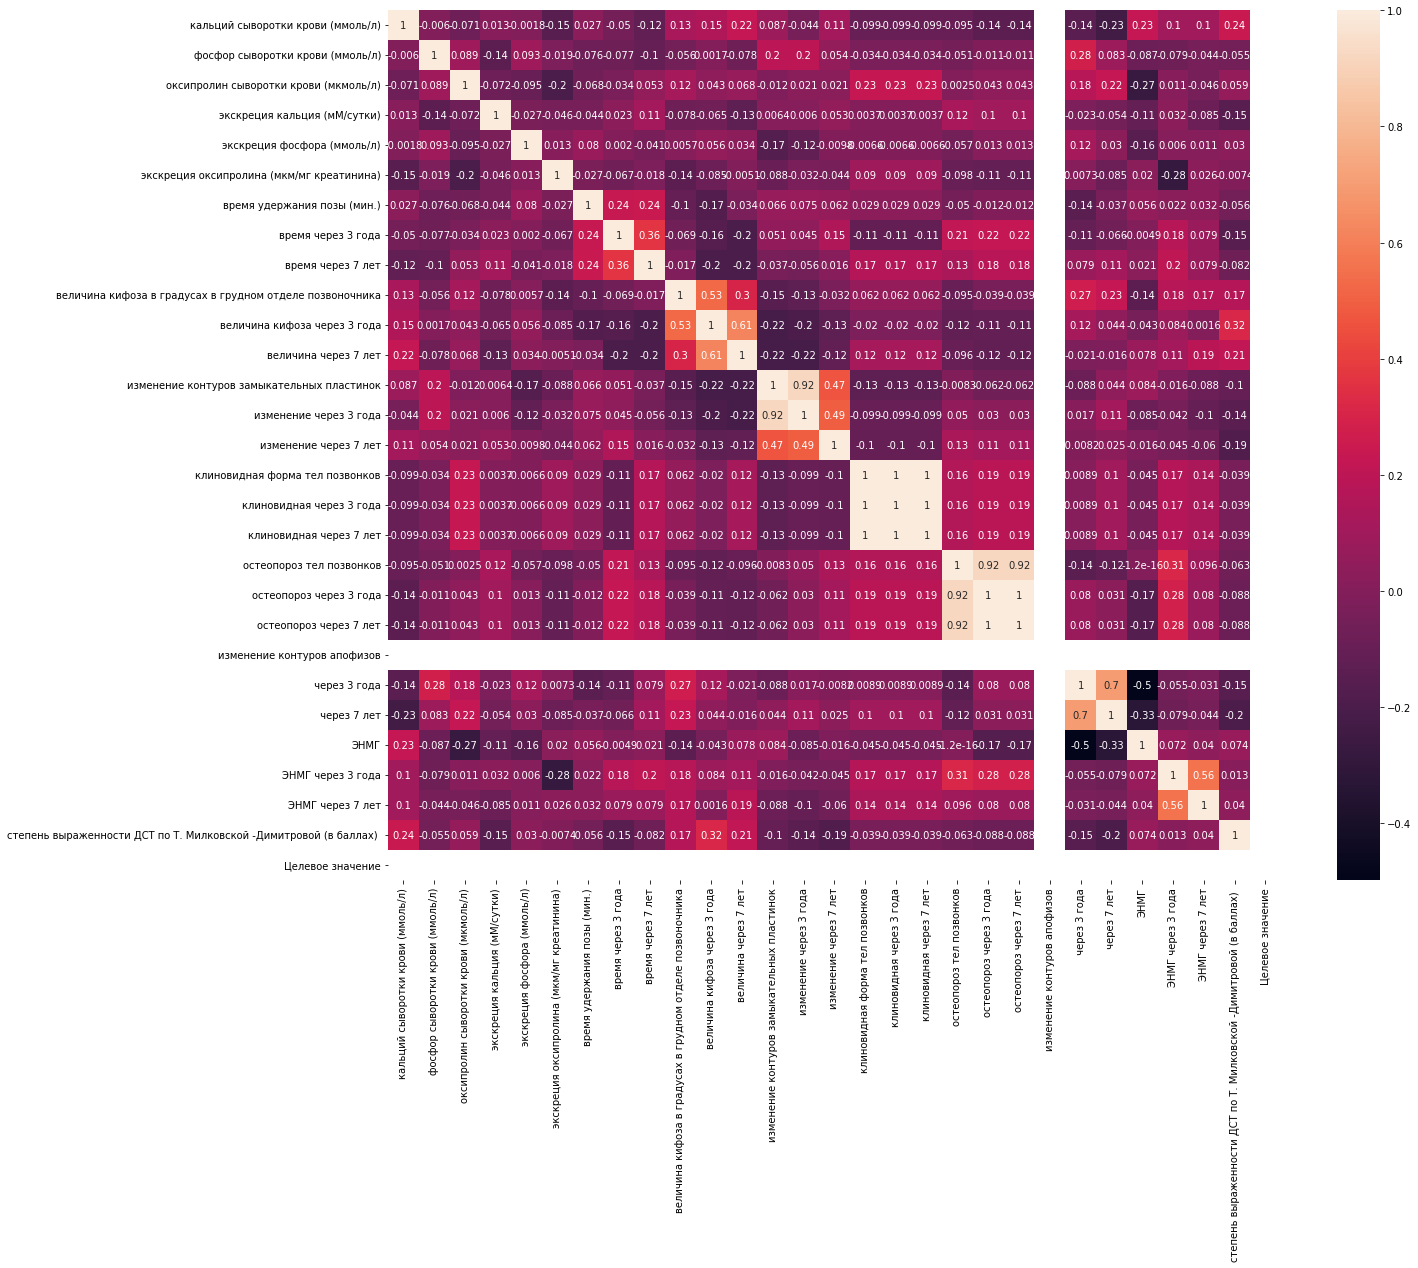

In [ ]:
plt.figure(figsize=(20, 16))
corr_matrix = time_target.corr()
sn.heatmap(corr_matrix, annot=True)

In [ ]:
target_df = time_target[['величина кифоза в градусах в грудном отделе позвоночника', 'кальций сыворотки крови (ммоль/л)',
                 'время удержания позы (мин.)', 'оксипролин сыворотки крови (мкмоль/л)', 'время через 3 года']]
X = time_target[['величина кифоза в градусах в грудном отделе позвоночника', 'кальций сыворотки крови (ммоль/л)',
                 'время удержания позы (мин.)', 'оксипролин сыворотки крови (мкмоль/л)']]
Y = time_target[['время через 3 года']]

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(X)

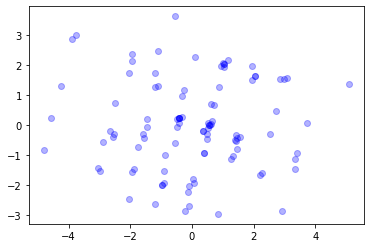

In [ ]:
plt.scatter(pca[:, 0], pca[:, 1], alpha=0.3, label="samples", color='blue')

In [ ]:
X.dtypes

величина кифоза в градусах в грудном отделе позвоночника    float64
кальций сыворотки крови (ммоль/л)                           float64
время удержания позы (мин.)                                 float64
оксипролин сыворотки крови (мкмоль/л)                       float64
dtype: object

In [ ]:
Y.dtypes

время через 3 года    float64
dtype: object

In [ ]:
X.describe()

,величина кифоза в градусах в грудном отделе позвоночника,кальций сыворотки крови (ммоль/л),время удержания позы (мин.),оксипролин сыворотки крови (мкмоль/л)
count,100.000000,100.000000,100.000000,100.000000
mean,29.470000,2.383700,2.150000,25.586200
std,1.904036,0.146533,1.021239,1.512477
min,25.000000,2.000000,1.000000,22.600000
25%,28.000000,2.300000,1.000000,24.575000
50%,30.000000,2.400000,2.000000,25.600000
75%,31.000000,2.500000,3.000000,26.700000
max,34.000000,2.600000,5.000000,28.900000


In [ ]:
Y.describe()

,время через 3 года
count,100.000000
mean,7.580000
std,0.944736
min,5.000000
25%,7.000000
50%,8.000000
75%,8.000000
max,10.000000


In [ ]:
Y['время через 3 года'].unique()

array([ 7.,  8.,  5.,  9.,  6., 10.])

In [ ]:
X.isna().sum()

величина кифоза в градусах в грудном отделе позвоночника    0
кальций сыворотки крови (ммоль/л)                           0
время удержания позы (мин.)                                 0
оксипролин сыворотки крови (мкмоль/л)                       0
dtype: int64

In [ ]:
Y.isna().sum()

время через 3 года    0
dtype: int64

In [ ]:
columns = list(X.columns)
print('No. of Columns to Visualize:' , len(columns))

No. of Columns to Visualize: 4



No. of Numerical Variables: 2
No. of Categorical Variables: 2



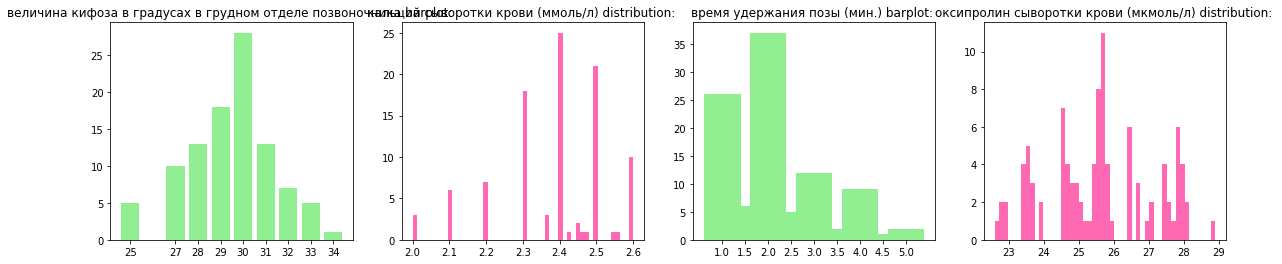

In [ ]:
# распределение вещественных и дискретных переменных
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
ax = ax.ravel()

no_cat = 0
no_num = 0

for i in range(4):
    if X[columns[i]].nunique() <= 10:
        no_cat+=1
        ax[i].bar(X[columns[i]].value_counts().sort_index().index, X[columns[i]].value_counts().sort_index().values, color='lightgreen') 
        ax[i].set_xticks(X[columns[i]].value_counts().sort_index().index)
        ax[i].set_title(f'{columns[i]} barplot: ');
    else:
        no_num+=1
        ax[i].hist(X[columns[i]], bins=50, color = "hotpink")
        ax[i].set_title(f'{columns[i]} distribution: ');

print()
print('No. of Numerical Variables:', no_num)
print('No. of Categorical Variables:', no_cat)
print()

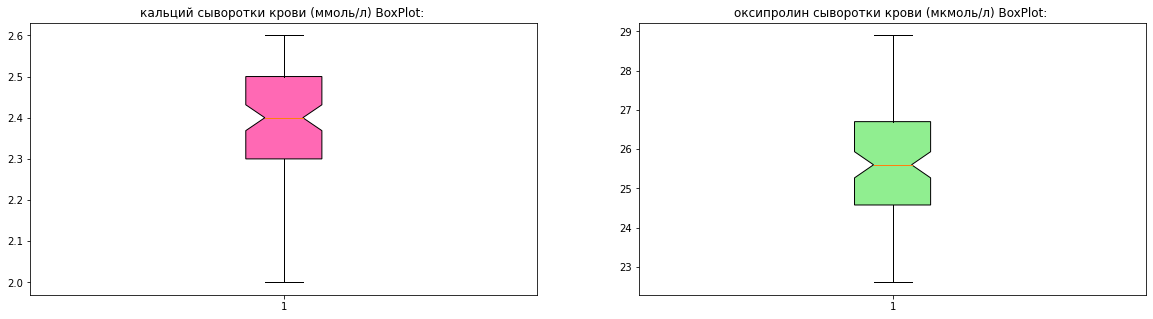

In [ ]:
# Вещественные переменные
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
ax = ax.ravel()
i=0
colors = ['hotpink','lightgreen', 'hotpink', 'lightgreen', 'hotpink']
for c in range(4):
    if X[columns[c]].nunique() > 10:
        bplot = ax[i].boxplot(X[columns[c]], notch=True, patch_artist=True)
        ax[i].set_title(f'{columns[c]} BoxPlot: ')
        bplot['boxes'][0].set_facecolor(colors[i])
        i+=1

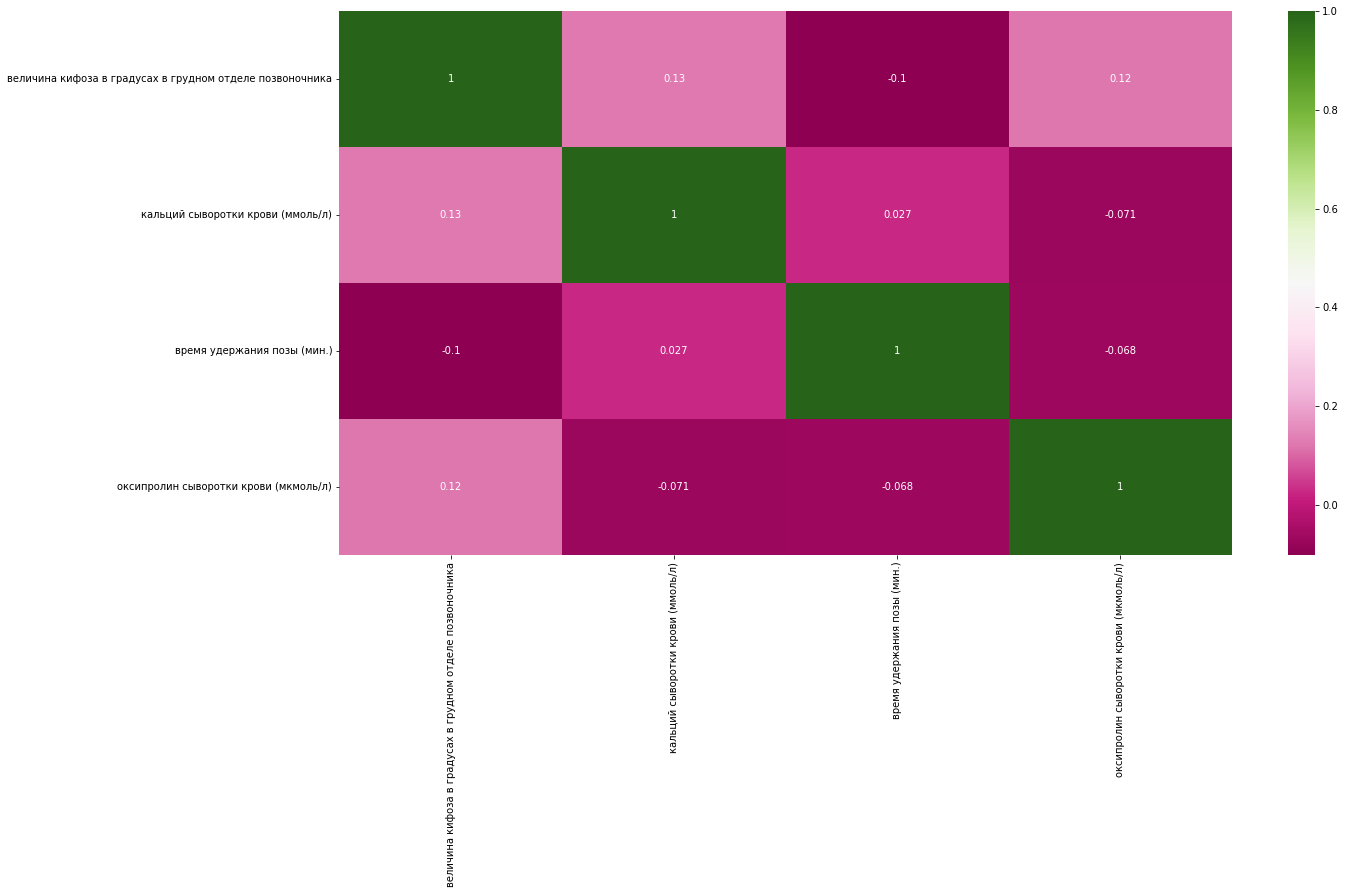

In [ ]:
# The Correlation Matrix
plt.figure(figsize=(20,10))
corr_matrix = X.corr()
mask = np.zeros_like(corr_matrix)
sn.heatmap(corr_matrix, mask=mask, annot=True, cmap="PiYG");

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42069)

# add an identifier and combine
X_train['istrain'] = 1
X_test['istrain'] = 0
X = pd.concat([X_train, X_test], axis = 0)

y = X['istrain'].copy()
X.drop('istrain', axis = 1, inplace = True)

In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'tree_method':'gpu_hist',
    'learning_rate': 0.05, 
    'max_depth': 4,
    'subsample': 0.8,
    'colsample_bytree': 0.5,
    'n_estimators':1000,
    'early_stopping_rounds':10
    }

In [ ]:
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_log_error
clf = XGBClassifier(**xgb_params, seed=42)

In [ ]:
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        x0, x1 = X.iloc[train_index], X.iloc[test_index]
        y0, y1 = y.iloc[train_index], y.iloc[test_index]
        clf.fit(x0, y0, eval_set=[(x1, y1)],
                verbose=False)
        
        prval = clf.predict_proba(x1)[:,1]
        print(f'Fold {i+1} AUC Score:', roc_auc_score(y1,prval))

Fold 1 AUC Score: 0.6190476190476191
Fold 2 AUC Score: 0.6666666666666667
Fold 3 AUC Score: 0.6547619047619049
Fold 4 AUC Score: 0.7380952380952381
Fold 5 AUC Score: 0.5833333333333333


In [ ]:
target_df['время через 3 года'] = np.log(target_df['время через 3 года'])
target_df

<ipython-input-99-670702959007>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['время через 3 года'] = np.log(target_df['время через 3 года'])


,величина кифоза в градусах в грудном отделе позвоночника,кальций сыворотки крови (ммоль/л),время удержания позы (мин.),оксипролин сыворотки крови (мкмоль/л),время через 3 года
0,27.0,2.5,1.0,24.60,1.945910
1,25.0,2.3,1.5,25.76,2.079442
2,30.0,2.6,2.0,23.70,1.945910
3,30.0,2.5,4.0,25.60,1.945910
4,31.0,2.4,2.0,27.50,1.609438
...,...,...,...,...,...
96,31.0,2.4,2.5,24.80,2.079442
97,30.0,2.4,3.0,23.90,2.079442
98,29.0,2.5,2.5,23.90,2.079442
99,30.0,2.3,1.0,25.80,1.945910


In [ ]:
FEATURES = ['величина кифоза в градусах в грудном отделе позвоночника', 'кальций сыворотки крови (ммоль/л)',
            'время удержания позы (мин.)', 'оксипролин сыворотки крови (мкмоль/л)']

In [ ]:
# Data Preparation
X = target_df[FEATURES].copy()
y = target_df['время через 3 года'].copy()

# Модель

In [ ]:
xgb_params = {
    'booster': 'gbtree',
    'objective' : 'reg:squarederror',
    'eval_metric':'rmse', 
    'learning_rate': 0.1,
    'max_depth': 10,
    'n_estimators': 9999,
    'early_stopping_rounds': 400,
    'tree_method':'gpu_hist',
    'subsample': 1.0,
    'colsample_bytree': 1.0,
    'seed': 42049
}

In [ ]:
# 5 KFold Training 
kf = KFold(n_splits=5, shuffle=True, random_state=42)
best_iteration_xgb = []
scores = []
MODELS = []

for i, (train_index, valid_index) in enumerate(kf.split(X, y)):
    
    print('#'*25)
    print('### Fold',i+1)
    print('#'*25)
    
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    
    X_valid = X.iloc[valid_index]
    y_valid = y.iloc[valid_index]
    
    model = XGBRegressor(**xgb_params)
    model.fit(X_train, y_train,
             eval_set=[(X_train, y_train), (X_valid, y_valid)],
             verbose=0)

    MODELS.append( model )
    
    fold_score = mean_squared_log_error(np.exp(y_valid), np.exp(model.predict(X_valid)), squared=False)
    print(f'Fold RMSLE Score:', fold_score)
    scores.append(fold_score)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = X_train.columns
    fold_importance_df["importance"] = model.feature_importances_
    
    best_iteration_xgb.append(model.best_ntree_limit)
    print('Fold Feature Importance:')
    display(fold_importance_df.sort_values(by='importance', ascending=False).head(10))
    
print()
print(f'Average Vaildation RMSLE Score:', sum(scores)/5)

#########################
### Fold 1
#########################
Fold RMSLE Score: 0.1540414686423754
Fold Feature Importance:


,feature,importance
3,оксипролин сыворотки крови (мкмоль/л),0.326110
1,кальций сыворотки крови (ммоль/л),0.317660
0,величина кифоза в градусах в грудном отделе по...,0.194751
2,время удержания позы (мин.),0.161479


#########################
### Fold 2
#########################
Fold RMSLE Score: 0.11813302480279649
Fold Feature Importance:


,feature,importance
3,оксипролин сыворотки крови (мкмоль/л),0.335133
2,время удержания позы (мин.),0.267269
1,кальций сыворотки крови (ммоль/л),0.233544
0,величина кифоза в градусах в грудном отделе по...,0.164055


#########################
### Fold 3
#########################
Fold RMSLE Score: 0.1266454443009407
Fold Feature Importance:


,feature,importance
2,время удержания позы (мин.),0.294747
3,оксипролин сыворотки крови (мкмоль/л),0.279105
1,кальций сыворотки крови (ммоль/л),0.214177
0,величина кифоза в градусах в грудном отделе по...,0.211971


#########################
### Fold 4
#########################
Fold RMSLE Score: 0.13814329581609752
Fold Feature Importance:


,feature,importance
3,оксипролин сыворотки крови (мкмоль/л),0.459613
2,время удержания позы (мин.),0.223806
1,кальций сыворотки крови (ммоль/л),0.165270
0,величина кифоза в градусах в грудном отделе по...,0.151312


#########################
### Fold 5
#########################
Fold RMSLE Score: 0.12225071675709315
Fold Feature Importance:


,feature,importance
3,оксипролин сыворотки крови (мкмоль/л),0.314637
2,время удержания позы (мин.),0.273913
0,величина кифоза в градусах в грудном отделе по...,0.214654
1,кальций сыворотки крови (ммоль/л),0.196796



Average Vaildation RMSLE Score: 0.13184279006386065


In [ ]:
submission = pd.DataFrame()
submission['id'] = pd.Series([i for i in range(30)])
for i in range(5):
    submission[f'time{i}'] = MODELS[i].predict(X_test[X_test.columns[:-1]])
submission['время через 3 года'] = (np.exp((submission.time0 + submission.time1 + submission.time2 + submission.time3 + submission.time4) / 4.9))
submission

,id,time0,time1,time2,time3,time4,время через 3 года
0,0,1.923122,1.946369,1.943163,1.946283,1.950372,7.253554
1,1,1.947755,1.945628,1.931681,1.938699,1.926130,7.224868
2,2,1.952174,2.078148,2.057362,2.042204,2.039010,7.966816
3,3,1.939618,1.946890,2.094181,1.947054,1.950454,7.507919
4,4,1.936767,2.077570,2.034197,1.870350,2.031991,7.620109
...,...,...,...,...,...,...,...
25,25,1.874305,1.935905,1.935163,1.945257,1.914593,7.101099
26,26,1.923122,2.188522,2.094181,2.186199,2.047249,8.418773
27,27,1.922354,1.945264,1.944258,1.946639,1.728206,6.931425
28,28,1.950047,2.189768,2.094712,2.048635,2.060691,8.256413


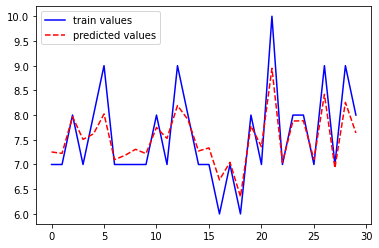

In [ ]:
plt.plot([i for i in range(30)], y_test, 'b-', label='train values')
plt.plot([i for i in range(30)], submission['время через 3 года'].values, 'r--', label='predicted values')
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, submission['время через 3 года'].values)

0.19342911971929577